# 하늘 위로 나는 것 같은, 천국을 연상케 하는 상승감, 꿈 속으로 빠지는 듯한 몽환적 느낌을 선사하는 곡

In [3]:
import librosa, librosa.display, librosa.feature
import numpy as np
import matplotlib.pyplot as plt
from pydub import AudioSegment
import sklearn
hop_length = 200

In [13]:
"""
sound = AudioSegment.from_mp3("euphoria_inst.mp3")
sound.export("euphoria_inst.wav", format="wav")
sound = AudioSegment.from_mp3("fatherfigure_inst.mp3")
sound.export("fatherfigure_inst.wav", format="wav")
sound = AudioSegment.from_mp3("makemeloveyou_inst.mp3")
sound.export("makemeloveyou_inst.wav", format="wav")
sound = AudioSegment.from_mp3("view_inst.mp3")
sound.export("view_inst.wav", format="wav")
"""

'\nsound = AudioSegment.from_mp3("euphoria_inst.mp3")\nsound.export("euphoria_inst.wav", format="wav")\nsound = AudioSegment.from_mp3("fatherfigure_inst.mp3")\nsound.export("fatherfigure_inst.wav", format="wav")\nsound = AudioSegment.from_mp3("makemeloveyou_inst.mp3")\nsound.export("makemeloveyou_inst.wav", format="wav")\nsound = AudioSegment.from_mp3("view_inst.mp3")\nsound.export("view_inst.wav", format="wav")\n'

In [4]:
euph, sr = librosa.load('euphoria_inst.wav', sr=44100, offset=0.458, duration=4.258)
# that's all I wanted~
ff, sr = librosa.load('fatherfigure_inst.wav', sr=44100, offset=19.128, duration=9.279)
mmly, sr = librosa.load('makemeloveyou_inst.wav', sr=44100, offset=0.624, duration=10.465)
view, sr = librosa.load('view_inst.wav', sr=44100, offset=0.525, duration=7.773)

## Feature Extraction
### 1. Spectral features
#### 1) MFCC

In [5]:
def vector_split(v, n_split):
    v=np.array(v)
    length=len(v)//n_split
    res=[]
    for i in range(n_split-1):
        res.append(v[i*length:(i+1)*length])
    res.append(v[(i+1)*length:])
    return np.array(res)

def split_mean(v, n_split):
    splitted_vector=vector_split(v, n_split)
    res=[]
    for i in splitted_vector:
        res.append(i.mean())
    return np.array(res)

[ 0.000000e+00 -1.039427e-08  0.000000e+00  0.000000e+00 -7.795703e-09
 -1.039427e-08 -1.039427e-08  0.000000e+00  0.000000e+00  5.197135e-09]


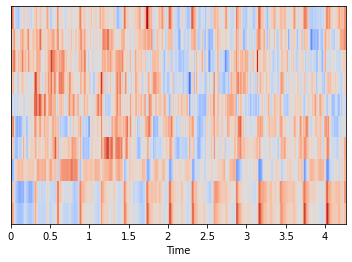

In [6]:
mfccs = librosa.feature.mfcc(euph, sr=44100, n_mfcc=10)
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print(mfccs.mean(axis=1))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

In [7]:
mfccs = librosa.feature.mfcc(euph, sr=44100, n_mfcc=20)
mfccs = split_mean(mfccs, 10)
print(mfccs)
mfccs = librosa.feature.mfcc(ff, sr=44100, n_mfcc=20)
mfccs = split_mean(mfccs, 10)
print(mfccs)
mfccs = librosa.feature.mfcc(mmly, sr=44100, n_mfcc=20)
mfccs = split_mean(mfccs, 10)
print(mfccs)
mfccs = librosa.feature.mfcc(view, sr=44100, n_mfcc=20)
mfccs = split_mean(mfccs, 10)
print(mfccs)

[-135.72102    -12.636698    16.705881   -11.973541   -15.865867
  -24.508701   -12.324959    -6.066916   -14.061914    -0.4612169]
[-104.40413      29.589289     16.241577      4.6750083     3.4086
   -0.34332693    1.3873236    -1.413382      1.5879828    -0.20342751]
[-9.1426659e+01  3.7602375e+01  9.0323162e+00  4.5516853e+00
  5.8730774e-02 -3.8210292e+00  2.1889613e+00  4.3635626e+00
  5.1380692e+00 -2.3610744e+00]
[-128.32097     44.7783      -4.1326294   -8.610771    -6.831081
  -10.755214    -9.078145    -6.185634    -3.9184177   -5.5957675]


### 2) spectral centroid

In [5]:
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

0.2405858524550285


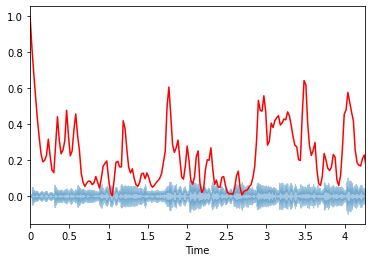

In [6]:
spectral_centroids = normalize(librosa.feature.spectral_centroid(euph, sr=sr)[0])
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
print(spectral_centroids.mean())
 # normalize for visualization purposes
librosa.display.waveplot(euph, sr=sr, alpha=0.4)
plt.plot(t, spectral_centroids, color='r')

0.24524084840103047


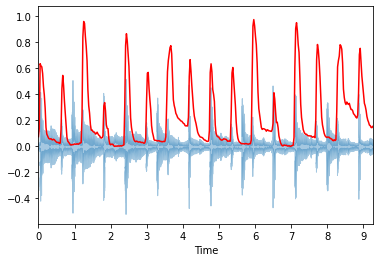

In [7]:
spectral_centroids = normalize(librosa.feature.spectral_centroid(ff, sr=sr)[0])
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
print(spectral_centroids.mean())
 # normalize for visualization purposes
librosa.display.waveplot(ff, sr=sr, alpha=0.4)
plt.plot(t, spectral_centroids, color='r')

0.06948151909063825


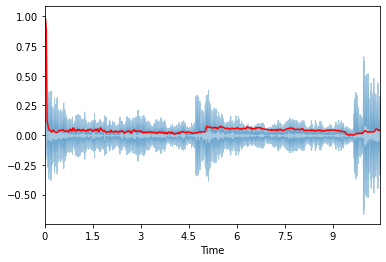

In [8]:
spectral_centroids = normalize(librosa.feature.spectral_centroid(mmly, sr=sr)[0])
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
print(spectral_centroids.mean())
 # normalize for visualization purposes
librosa.display.waveplot(mmly, sr=sr, alpha=0.4)
plt.plot(t, spectral_centroids, color='r')

0.24322219649417876


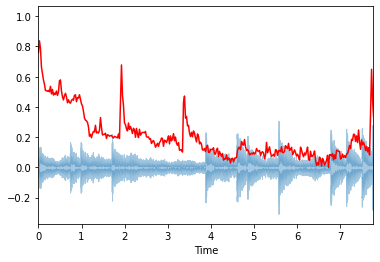

In [9]:
spectral_centroids = normalize(librosa.feature.spectral_centroid(view, sr=sr)[0])
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
print(spectral_centroids.mean())
 # normalize for visualization purposes
librosa.display.waveplot(view, sr=sr, alpha=0.4)
plt.plot(t, spectral_centroids, color='r')

### 3) spectral roll-off

In [10]:
spectral_rolloff = normalize(librosa.feature.spectral_rolloff(euph+0.01, sr=sr)[0])
print(spectral_rolloff.mean())
spectral_rolloff = normalize(librosa.feature.spectral_rolloff(ff+0.01, sr=sr)[0])
print(spectral_rolloff.mean())
spectral_rolloff = normalize(librosa.feature.spectral_rolloff(mmly+0.01, sr=sr)[0])
print(spectral_rolloff.mean())
spectral_rolloff = normalize(librosa.feature.spectral_rolloff(view+0.01, sr=sr)[0])
print(spectral_rolloff.mean())

0.35154330638316883
0.3738442211055276
0.1491947718520247
0.2683624132856843


## 2. tempo features
### 1) global tempo

In [11]:
euph_tempo = librosa.beat.tempo(euph, sr=sr)
print(euph_tempo)
ff_tempo = librosa.beat.tempo(ff, sr=sr)
print(ff_tempo)
mmly_tempo = librosa.beat.tempo(mmly, sr=sr)
print(mmly_tempo)
view_tempo = librosa.beat.tempo(view, sr=sr)
print(view_tempo)

[105.46875]
[101.33272059]
[117.45383523]
[82.03125]


### 2) Novelty Function

Text(0.5, 1.0, 'Novelty Function')

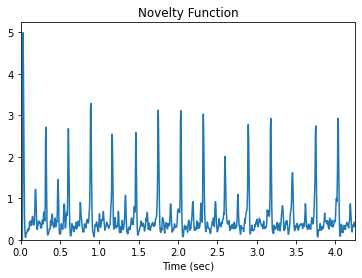

In [18]:
euph_onset_env = librosa.onset.onset_strength(euph, sr=sr, hop_length=hop_length, n_fft=2048)
# Plot the onset envelope
frames = range(len(euph_onset_env))
euph_t = librosa.frames_to_time(frames, sr=sr, hop_length=hop_length)
plt.plot(euph_t, euph_onset_env)
plt.xlim(0, euph_t.max())
plt.ylim(0)
plt.xlabel('Time (sec)')
plt.title('Novelty Function')

Text(0.5, 1.0, 'Novelty Function')

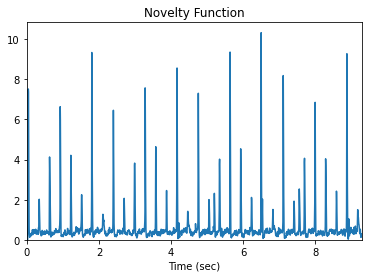

In [19]:
ff_onset_env = librosa.onset.onset_strength(ff, sr=sr, hop_length=hop_length, n_fft=2048)
# Plot the onset envelope
frames = range(len(ff_onset_env))
ff_t = librosa.frames_to_time(frames, sr=sr, hop_length=hop_length)
plt.plot(ff_t, ff_onset_env)
plt.xlim(0, ff_t.max())
plt.ylim(0)
plt.xlabel('Time (sec)')
plt.title('Novelty Function')

Text(0.5, 1.0, 'Novelty Function')

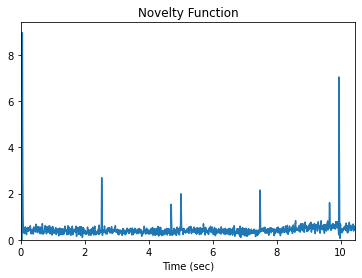

In [20]:
mmly_onset_env = librosa.onset.onset_strength(mmly, sr=sr, hop_length=hop_length, n_fft=2048)
# Plot the onset envelope
frames = range(len(mmly_onset_env))
mmly_t = librosa.frames_to_time(frames, sr=sr, hop_length=hop_length)
plt.plot(mmly_t, mmly_onset_env)
plt.xlim(0, mmly_t.max())
plt.ylim(0)
plt.xlabel('Time (sec)')
plt.title('Novelty Function')

Text(0.5, 1.0, 'Novelty Function')

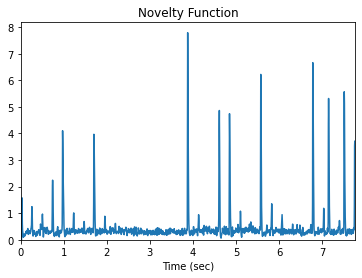

In [21]:
view_onset_env = librosa.onset.onset_strength(view, sr=sr, hop_length=hop_length, n_fft=2048)
# Plot the onset envelope
frames = range(len(view_onset_env))
view_t = librosa.frames_to_time(frames, sr=sr, hop_length=hop_length)
plt.plot(view_t, view_onset_env)
plt.xlim(0, view_t.max())
plt.ylim(0)
plt.xlabel('Time (sec)')
plt.title('Novelty Function')

### 3) Fourier Tempogram

(257, 940)
0.03605828


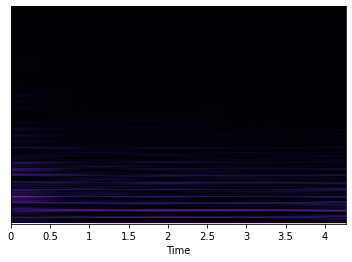

In [22]:
S = librosa.stft(euph_onset_env, hop_length=1, n_fft=512)
euph_fourier_tempogram = np.absolute(S)
librosa.display.specshow(euph_fourier_tempogram, sr=sr, hop_length=hop_length, x_axis='time')
euph_tempo = (normalize(euph_fourier_tempogram)).mean()
print(euph_fourier_tempogram.shape)
print(euph_tempo)

(257, 2048)
0.05714834


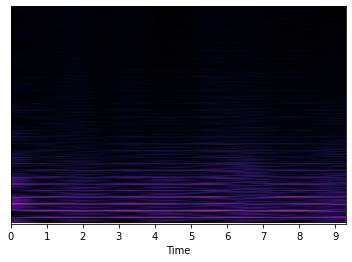

In [23]:
S = librosa.stft(ff_onset_env, hop_length=1, n_fft=512)
ff_fourier_tempogram = np.absolute(S)
librosa.display.specshow(ff_fourier_tempogram, sr=sr, hop_length=hop_length, x_axis='time')
ff_tempo = (normalize(ff_fourier_tempogram)).mean()
print(ff_fourier_tempogram.shape)
print(ff_tempo)

(257, 2309)
0.025791029


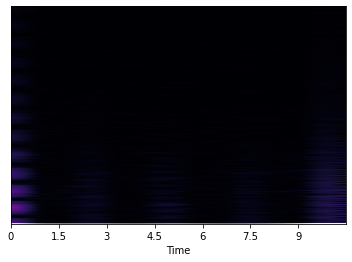

In [24]:
S = librosa.stft(mmly_onset_env, hop_length=1, n_fft=512)
mmly_fourier_tempogram = np.absolute(S)
librosa.display.specshow(mmly_fourier_tempogram, sr=sr, hop_length=hop_length, x_axis='time')
mmly_tempo = (normalize(mmly_fourier_tempogram)).mean()
print(mmly_fourier_tempogram.shape)
print(mmly_tempo)

(257, 1715)
0.048118994


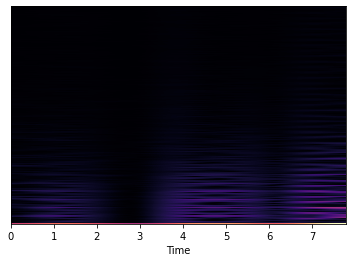

In [25]:
S = librosa.stft(view_onset_env, hop_length=1, n_fft=512)
view_fourier_tempogram = np.absolute(S)
librosa.display.specshow(view_fourier_tempogram, sr=sr, hop_length=hop_length, x_axis='time')
view_tempo = (normalize(view_fourier_tempogram)).mean()
print(view_fourier_tempogram.shape)
print(view_tempo)